In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
%matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [ ]:
train_rule = pd.read_csv("/content/drive/MyDrive/Dataset/Wyze/train_rule.csv")
train_rule

,user_id,trigger_device,trigger_device_id,trigger_state,trigger_state_id,action,action_id,action_device,action_device_id,rule
0,180853,Switch,658173,Double Press,12,Turn off,20,Plug,846218,658173_12_20_846218
1,7327,Camera,827382,Detects a person,6,Turn on,30,Plug,718778,827382_6_30_718778
2,257281,Switch,1752653,Double Press,12,Turn on,30,Plug,1327057,1752653_12_30_1327057
3,257281,Switch,1752653,Triple Press,37,Turn off,20,Plug,1327057,1752653_37_20_1327057
4,185855,MotionSensor,446559,Detects motion,9,Turn on,30,Plug,1257204,446559_9_30_1257204
...,...,...,...,...,...,...,...,...,...,...
852067,19922,Camera,901818,Detects smoke alarm sound,10,Unmute Notifications,45,Cloud,1797174,901818_10_45_1797174
852068,59815,Camera,825120,Detects motion,9,Unmute Notifications,45,Cloud,1797174,825120_9_45_1797174
852069,344986,Camera,1423925,Detects a person,6,Unmute Notifications,45,Cloud,1797174,1423925_6_45_1797174
852070,237256,Camera,390149,Detects a person,6,Unmute Notifications,45,Cloud,1797174,390149_6_45_1797174


In [ ]:
train_device = pd.read_csv("/content/drive/MyDrive/Dataset/Wyze/train_device.csv")
train_device

,user_id,device_id,device_model
0,245714,1343229,ContactSensor
1,245714,509168,ContactSensor
2,245714,428861,MotionSensor
3,245714,1385428,Camera
4,245714,300856,MotionSensor
...,...,...,...
1354093,32397,1713350,Plug
1354094,32397,813118,Camera
1354095,32397,288803,Camera
1354096,32397,20606,Camera


In [ ]:
merged_train = pd.merge(train_rule, train_device, on = 'user_id', how = 'inner')
merged_train.head()

,user_id,trigger_device,trigger_device_id,trigger_state,trigger_state_id,action,action_id,action_device,action_device_id,rule,device_id,device_model
0,180853,Switch,658173,Double Press,12,Turn off,20,Plug,846218,658173_12_20_846218,80000,Switch
1,180853,Switch,658173,Double Press,12,Turn off,20,Plug,846218,658173_12_20_846218,1505856,Camera
2,180853,Switch,658173,Double Press,12,Turn off,20,Plug,846218,658173_12_20_846218,1741296,Light
3,180853,Switch,658173,Double Press,12,Turn off,20,Plug,846218,658173_12_20_846218,337856,MeshLight
4,180853,Switch,658173,Double Press,12,Turn off,20,Plug,846218,658173_12_20_846218,108067,MeshLight


In [ ]:
#merged_train = merged_train.drop('rule', axis = 1)

In [ ]:
df = merged_train

In [ ]:
rating_counts = df.groupby(['user_id', 'device_model', 'trigger_device_id', 'trigger_state_id','action_id', 'action_device_id']).size().reset_index(name='count')

In [ ]:
max_count = rating_counts['count'].max()

rating_counts['Rating'] = (rating_counts['count'] / max_count) * 5

In [ ]:
df = df.merge(rating_counts[['user_id', 'device_model', 'trigger_device_id','trigger_state_id','action_id', 'action_device_id', 'Rating']], on=['user_id', 'device_model', 'trigger_device_id', 'trigger_state_id','action_id', 'action_device_id'], how='left')
df

,user_id,trigger_device,trigger_device_id,trigger_state,trigger_state_id,action,action_id,action_device,action_device_id,rule,device_id,device_model,Rating
0,180853,Switch,658173,Double Press,12,Turn off,20,Plug,846218,658173_12_20_846218,80000,Switch,0.247934
1,180853,Switch,658173,Double Press,12,Turn off,20,Plug,846218,658173_12_20_846218,1505856,Camera,0.206612
2,180853,Switch,658173,Double Press,12,Turn off,20,Plug,846218,658173_12_20_846218,1741296,Light,0.454545
3,180853,Switch,658173,Double Press,12,Turn off,20,Plug,846218,658173_12_20_846218,337856,MeshLight,0.206612
4,180853,Switch,658173,Double Press,12,Turn off,20,Plug,846218,658173_12_20_846218,108067,MeshLight,0.206612
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8463715,59815,Camera,825120,Detects motion,9,Unmute Notifications,45,Cloud,1797174,825120_9_45_1797174,512961,Camera,0.123967
8463716,344986,Camera,1423925,Detects a person,6,Unmute Notifications,45,Cloud,1797174,1423925_6_45_1797174,234809,Camera,0.165289
8463717,344986,Camera,1423925,Detects a person,6,Unmute Notifications,45,Cloud,1797174,1423925_6_45_1797174,1423925,Camera,0.165289
8463718,344986,Camera,1423925,Detects a person,6,Unmute Notifications,45,Cloud,1797174,1423925_6_45_1797174,340156,Camera,0.165289


In [ ]:
# RS part 1

In [ ]:
df_filtered = df[df['Rating'] >= 1]

df_filtered

,user_id,trigger_device,trigger_device_id,trigger_state,trigger_state_id,action,action_id,action_device,action_device_id,rule,device_id,device_model,Rating
21825,45855,MotionSensor,1225294,Has been clear for,13,Turn off,20,Light,222221,1225294_13_20_222221,1285254,Camera,1.239669
21826,45855,MotionSensor,1225294,Has been clear for,13,Turn off,20,Light,222221,1225294_13_20_222221,1731393,Camera,1.239669
21830,45855,MotionSensor,1225294,Has been clear for,13,Turn off,20,Light,222221,1225294_13_20_222221,884358,Camera,1.239669
21831,45855,MotionSensor,1225294,Has been clear for,13,Turn off,20,Light,222221,1225294_13_20_222221,1656053,Camera,1.239669
21832,45855,MotionSensor,1225294,Has been clear for,13,Turn off,20,Light,222221,1225294_13_20_222221,190290,Camera,1.239669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8455029,285930,Camera,742466,Detects motion,9,Unmute Notifications,45,Cloud,1797174,742466_9_45_1797174,1087169,Camera,1.363636
8455030,285930,Camera,742466,Detects motion,9,Unmute Notifications,45,Cloud,1797174,742466_9_45_1797174,703933,Camera,1.363636
8455031,285930,Camera,742466,Detects motion,9,Unmute Notifications,45,Cloud,1797174,742466_9_45_1797174,42416,Camera,1.363636
8455032,285930,Camera,742466,Detects motion,9,Unmute Notifications,45,Cloud,1797174,742466_9_45_1797174,902456,Camera,1.363636


In [ ]:
df_filtered.reset_index(inplace= True)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524609 entries, 0 to 524608
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              524609 non-null  int64  
 1   user_id            524609 non-null  int64  
 2   trigger_device     524609 non-null  object 
 3   trigger_device_id  524609 non-null  int64  
 4   trigger_state      524609 non-null  object 
 5   trigger_state_id   524609 non-null  int64  
 6   action             524609 non-null  object 
 7   action_id          524609 non-null  int64  
 8   action_device      524609 non-null  object 
 9   action_device_id   524609 non-null  int64  
 10  rule               524609 non-null  object 
 11  device_id          524609 non-null  int64  
 12  device_model       524609 non-null  object 
 13  Rating             524609 non-null  float64
dtypes: float64(1), int64(7), object(6)
memory usage: 56.0+ MB


In [ ]:
popular_devices = pd.DataFrame(df_filtered.groupby('device_model')['Rating'].count())
most_popular = popular_devices.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
device_model,
Camera,296390
MeshLight,100260
Light,55174
ContactSensor,27513
Switch,26202
Plug,17886
MotionSensor,360
OutdoorPlug,304
Lock,250


<Axes: xlabel='device_model'>

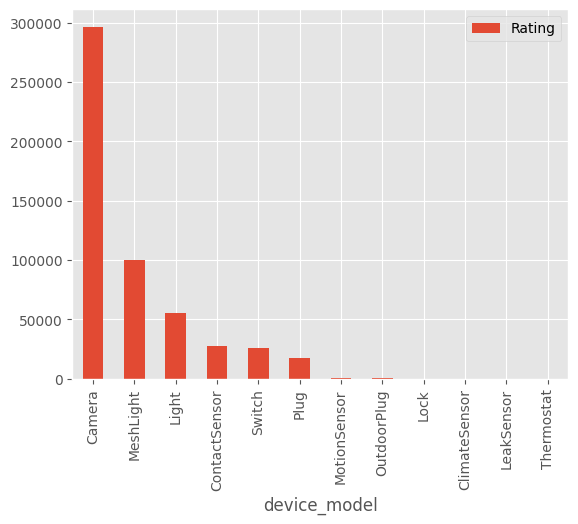

In [ ]:
most_popular.head(16).plot(kind = "bar")

In [ ]:
# RS part 2

In [ ]:
df1 = df_filtered

In [ ]:
#from sklearn.model_selection import train_test_split
#train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
#df1 = train_df

In [ ]:
utility_matrix = df1.pivot_table(values='Rating', index='user_id', columns='device_model', fill_value=0)
utility_matrix.head()

device_model,Camera,ClimateSensor,ContactSensor,LeakSensor,Light,Lock,MeshLight,MotionSensor,OutdoorPlug,Plug,Switch,Thermostat
user_id,,,,,,,,,,,,
340,0.000000,0.0,0.000000,0.000000,0.0,1.033058,0.0,0.0,0.0,0.0,0.0,0.0
433,1.033058,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
665,1.033058,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
675,1.363636,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1045,0.000000,0.0,1.198347,1.239669,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
utility_matrix.shape

(942, 12)

In [ ]:
# Transpose the matrix

In [ ]:
X = utility_matrix.T
X.head()

user_id,340,433,665,675,1045,1769,2909,3607,4460,4718,...,344519,344687,344733,345017,345033,345425,345552,345718,345863,345871
device_model,,,,,,,,,,,,,,,,,,,,,
Camera,0.0,1.033058,1.033058,1.363636,0.000000,1.570248,1.033058,1.07438,1.033058,1.280992,...,0.000000,0.000000,0.00000,0.0,0.000000,1.280992,1.07438,1.239669,1.033058,1.61157
ClimateSensor,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
ContactSensor,0.0,0.000000,0.000000,0.000000,1.198347,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,1.280992,0.000000,0.00000,0.000000,0.000000,0.00000
LeakSensor,0.0,0.000000,0.000000,0.000000,1.239669,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
Light,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.363636,1.446281,1.07438,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000


In [ ]:
X.shape

(12, 942)

In [ ]:
X1 = X

In [ ]:
#Decomposing the Matrix

In [ ]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(12, 10)

In [ ]:
# Correlation Matrix

In [ ]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(12, 12)

In [ ]:
# Isolating devices

In [ ]:
X.index[10]

'Switch'

In [ ]:
i = "OutdoorPlug"

device_names = list(X.index)
model_device = device_names.index(i)
model_device

8

In [ ]:
correlation_model_device = correlation_matrix[model_device]
correlation_model_device.shape

(12,)

### Recommending top 10 highly correlated devices in sequence

In [ ]:
Recommend = list(X.index[correlation_model_device > 0])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]


['MotionSensor']

In [ ]:
# RS part 3

In [ ]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Concatenate the text from multiple columns into a single column
#df1['combined_text'] = df1['trigger_device'] + ' '+ df1['trigger_state'] + ' ' + df1['action'] + ' ' + df1['action_device']

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Vectorize the combined_text column
X1 = vectorizer.fit_transform(df1['rule'])
X1


<524609x14306 sparse matrix of type '<class 'numpy.float64'>'
	with 524609 stored elements in Compressed Sparse Row format>

### Visualizing product clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


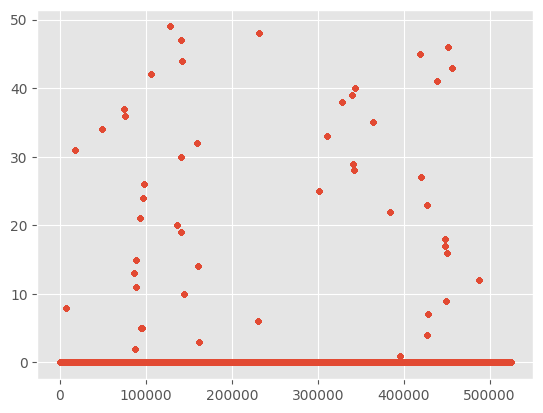

In [ ]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 50, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [ ]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :51]:
        print(' %s' % terms[ind]),
    print

In [ ]:
# # Optimal clusters is

true_k = 5

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=50, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 143162_6_46_143162
 1638741_6_46_1638741
 1615437_6_42_1615437
 1615437_6_42_177877
 1615437_6_46_1615437
 1615437_6_46_177877
 562563_6_46_562563
 562563_6_42_562563
 555054_6_46_555054
 555054_6_42_555054
 907995_6_42_907995
 532331_6_42_532331
 520511_6_46_520511
 520511_6_42_520511
 143162_6_42_143162
 912373_6_42_912373
 912373_6_46_912373
 1612576_6_46_1612576
 1612576_6_42_1612576
 1600200_6_46_1600200
 1582554_6_42_1582554
 63411_6_42_63411
 63411_6_38_63411
 1112841_6_38_1112841
 1112841_6_42_1112841
 1112841_6_46_1112841
 187006_6_46_187006
 187006_6_42_187006
 1600200_6_42_1600200
 1582554_6_46_1582554
 618179_6_46_618179
 618179_6_42_618179
 1383843_6_42_1383843
 1120674_6_42_1120674
 1120674_6_46_1120674
 1638741_6_42_1638741
 1650826_6_42_1650826
 12735_6_46_12735
 1655703_6_42_1655703
 346908_6_46_346908
 346908_6_42_346908
 1234564_6_46_74704
 1234564_6_46_1234564
 1234564_6_42_74704
 1234564_6_42_1234564
 123427_6_46_123427
 1755995_6

In [ ]:
def show_recommendations(rule):
    #print("Cluster ID:")
    Y = vectorizer.transform([rule])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [ ]:
show_recommendations("Camera")

Cluster 0:
 143162_6_46_143162
 1638741_6_46_1638741
 1615437_6_42_1615437
 1615437_6_42_177877
 1615437_6_46_1615437
 1615437_6_46_177877
 562563_6_46_562563
 562563_6_42_562563
 555054_6_46_555054
 555054_6_42_555054
 907995_6_42_907995
 532331_6_42_532331
 520511_6_46_520511
 520511_6_42_520511
 143162_6_42_143162
 912373_6_42_912373
 912373_6_46_912373
 1612576_6_46_1612576
 1612576_6_42_1612576
 1600200_6_46_1600200
 1582554_6_42_1582554
 63411_6_42_63411
 63411_6_38_63411
 1112841_6_38_1112841
 1112841_6_42_1112841
 1112841_6_46_1112841
 187006_6_46_187006
 187006_6_42_187006
 1600200_6_42_1600200
 1582554_6_46_1582554
 618179_6_46_618179
 618179_6_42_618179
 1383843_6_42_1383843
 1120674_6_42_1120674
 1120674_6_46_1120674
 1638741_6_42_1638741
 1650826_6_42_1650826
 12735_6_46_12735
 1655703_6_42_1655703
 346908_6_46_346908
 346908_6_42_346908
 1234564_6_46_74704
 1234564_6_46_1234564
 1234564_6_42_74704
 1234564_6_42_1234564
 123427_6_46_123427
 1755995_6_42_1755995
 1755995_6_

In [ ]:
show_recommendations("irrigation")

Cluster 0:
 143162_6_46_143162
 1638741_6_46_1638741
 1615437_6_42_1615437
 1615437_6_42_177877
 1615437_6_46_1615437
 1615437_6_46_177877
 562563_6_46_562563
 562563_6_42_562563
 555054_6_46_555054
 555054_6_42_555054
 907995_6_42_907995
 532331_6_42_532331
 520511_6_46_520511
 520511_6_42_520511
 143162_6_42_143162
 912373_6_42_912373
 912373_6_46_912373
 1612576_6_46_1612576
 1612576_6_42_1612576
 1600200_6_46_1600200
 1582554_6_42_1582554
 63411_6_42_63411
 63411_6_38_63411
 1112841_6_38_1112841
 1112841_6_42_1112841
 1112841_6_46_1112841
 187006_6_46_187006
 187006_6_42_187006
 1600200_6_42_1600200
 1582554_6_46_1582554
 618179_6_46_618179
 618179_6_42_618179
 1383843_6_42_1383843
 1120674_6_42_1120674
 1120674_6_46_1120674
 1638741_6_42_1638741
 1650826_6_42_1650826
 12735_6_46_12735
 1655703_6_42_1655703
 346908_6_46_346908
 346908_6_42_346908
 1234564_6_46_74704
 1234564_6_46_1234564
 1234564_6_42_74704
 1234564_6_42_1234564
 123427_6_46_123427
 1755995_6_42_1755995
 1755995_6_

In [ ]:
# importing test data

In [ ]:
test_rule = pd.read_csv("/content/drive/MyDrive/Dataset/Wyze/test_rule.csv")
test_rule

,user_id,trigger_device,trigger_device_id,trigger_state,trigger_state_id,action,action_id,action_device,action_device_id,rule
0,4,ContactSensor,1305867,Has been open for,17,Unmute Notifications,45,Cloud,1797174,1305867_17_45_1797174
1,19,ContactSensor,1426277,Opens,25,Turn on the camera,41,Camera,263477,1426277_25_41_263477
2,19,ContactSensor,1135274,Opens,25,Turn on the camera,41,Camera,263477,1135274_25_41_263477
3,19,ContactSensor,1135274,Opens,25,Turn on notifications,38,Camera,695810,1135274_25_38_695810
4,19,ContactSensor,1135274,Opens,25,Turn on motion detection,37,Camera,695810,1135274_25_37_695810
...,...,...,...,...,...,...,...,...,...,...
60740,345883,Camera,179520,Detects motion,9,Turn on motion detection,37,Camera,179520,179520_9_37_179520
60741,345883,Camera,1269910,Detects motion,9,Unmute Notifications,45,Cloud,1797174,1269910_9_45_1797174
60742,345883,Camera,179520,Detects motion,9,Upload a short video to the cloud,46,Camera,179520,179520_9_46_179520
60743,345896,Camera,612195,Detects a pet,7,Turn on the camera,41,Camera,842534,612195_7_41_842534


In [ ]:
test_device= pd.read_csv("/content/drive/MyDrive/Dataset/Wyze/test_device.csv")
test_device

,user_id,device_id,device_model
0,20017,977316,Camera
1,20017,1407198,Camera
2,295051,1119712,Camera
3,295051,1626523,Camera
4,295051,166771,Camera
...,...,...,...
110202,316350,56137,Camera
110203,316350,771282,Camera
110204,316350,573424,Camera
110205,295898,1104613,Camera


In [ ]:
merged_test = pd.merge(test_rule, test_device, on = 'user_id', how = 'inner')
merged_test

,user_id,trigger_device,trigger_device_id,trigger_state,trigger_state_id,action,action_id,action_device,action_device_id,rule,device_id,device_model
0,4,ContactSensor,1305867,Has been open for,17,Unmute Notifications,45,Cloud,1797174,1305867_17_45_1797174,1756259,Camera
1,4,ContactSensor,1305867,Has been open for,17,Unmute Notifications,45,Cloud,1797174,1305867_17_45_1797174,131284,Camera
2,4,ContactSensor,1305867,Has been open for,17,Unmute Notifications,45,Cloud,1797174,1305867_17_45_1797174,509416,OutdoorPlug
3,4,ContactSensor,1305867,Has been open for,17,Unmute Notifications,45,Cloud,1797174,1305867_17_45_1797174,20269,OutdoorPlug
4,4,ContactSensor,1305867,Has been open for,17,Unmute Notifications,45,Cloud,1797174,1305867_17_45_1797174,1066644,Camera
...,...,...,...,...,...,...,...,...,...,...,...,...
881084,345896,Camera,612195,Detects a pet,7,Turn on the camera,41,Camera,842534,612195_7_41_842534,1728720,Camera
881085,345896,Camera,612195,Detects a pet,7,Turn on the camera,41,Camera,842534,612195_7_41_842534,612195,Camera
881086,345896,Camera,612195,Detects a pet,7,Turn on the camera,41,Camera,1728720,612195_7_41_1728720,842534,Camera
881087,345896,Camera,612195,Detects a pet,7,Turn on the camera,41,Camera,1728720,612195_7_41_1728720,1728720,Camera


In [ ]:
#merged_test = merged_test.drop('rule', axis = 1)

In [ ]:
df2 = merged_test

In [ ]:
rating_counts2 = df2.groupby(['user_id', 'device_model', 'trigger_device_id', 'trigger_state_id','action_id', 'action_device_id']).size().reset_index(name='count')

In [ ]:
max_count2 = rating_counts2['count'].max()

rating_counts2['Rating'] = (rating_counts2['count'] / max_count2) * 5

In [ ]:
df2 = df2.merge(rating_counts2[['user_id', 'device_model', 'trigger_device_id','trigger_state_id','action_id', 'action_device_id', 'Rating']], on=['user_id', 'device_model', 'trigger_device_id', 'trigger_state_id','action_id', 'action_device_id'], how='left')
df2

,user_id,trigger_device,trigger_device_id,trigger_state,trigger_state_id,action,action_id,action_device,action_device_id,rule,device_id,device_model,Rating
0,4,ContactSensor,1305867,Has been open for,17,Unmute Notifications,45,Cloud,1797174,1305867_17_45_1797174,1756259,Camera,0.5625
1,4,ContactSensor,1305867,Has been open for,17,Unmute Notifications,45,Cloud,1797174,1305867_17_45_1797174,131284,Camera,0.5625
2,4,ContactSensor,1305867,Has been open for,17,Unmute Notifications,45,Cloud,1797174,1305867_17_45_1797174,509416,OutdoorPlug,0.1250
3,4,ContactSensor,1305867,Has been open for,17,Unmute Notifications,45,Cloud,1797174,1305867_17_45_1797174,20269,OutdoorPlug,0.1250
4,4,ContactSensor,1305867,Has been open for,17,Unmute Notifications,45,Cloud,1797174,1305867_17_45_1797174,1066644,Camera,0.5625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881084,345896,Camera,612195,Detects a pet,7,Turn on the camera,41,Camera,842534,612195_7_41_842534,1728720,Camera,0.1875
881085,345896,Camera,612195,Detects a pet,7,Turn on the camera,41,Camera,842534,612195_7_41_842534,612195,Camera,0.1875
881086,345896,Camera,612195,Detects a pet,7,Turn on the camera,41,Camera,1728720,612195_7_41_1728720,842534,Camera,0.1875
881087,345896,Camera,612195,Detects a pet,7,Turn on the camera,41,Camera,1728720,612195_7_41_1728720,1728720,Camera,0.1875


In [ ]:
df_filtered1 = df2

df_filtered1

,user_id,trigger_device,trigger_device_id,trigger_state,trigger_state_id,action,action_id,action_device,action_device_id,rule,device_id,device_model,Rating
0,4,ContactSensor,1305867,Has been open for,17,Unmute Notifications,45,Cloud,1797174,1305867_17_45_1797174,1756259,Camera,0.5625
1,4,ContactSensor,1305867,Has been open for,17,Unmute Notifications,45,Cloud,1797174,1305867_17_45_1797174,131284,Camera,0.5625
2,4,ContactSensor,1305867,Has been open for,17,Unmute Notifications,45,Cloud,1797174,1305867_17_45_1797174,509416,OutdoorPlug,0.1250
3,4,ContactSensor,1305867,Has been open for,17,Unmute Notifications,45,Cloud,1797174,1305867_17_45_1797174,20269,OutdoorPlug,0.1250
4,4,ContactSensor,1305867,Has been open for,17,Unmute Notifications,45,Cloud,1797174,1305867_17_45_1797174,1066644,Camera,0.5625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881084,345896,Camera,612195,Detects a pet,7,Turn on the camera,41,Camera,842534,612195_7_41_842534,1728720,Camera,0.1875
881085,345896,Camera,612195,Detects a pet,7,Turn on the camera,41,Camera,842534,612195_7_41_842534,612195,Camera,0.1875
881086,345896,Camera,612195,Detects a pet,7,Turn on the camera,41,Camera,1728720,612195_7_41_1728720,842534,Camera,0.1875
881087,345896,Camera,612195,Detects a pet,7,Turn on the camera,41,Camera,1728720,612195_7_41_1728720,1728720,Camera,0.1875


In [ ]:
df_filtered1.reset_index(inplace= True)
df_filtered1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881089 entries, 0 to 881088
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              881089 non-null  int64  
 1   user_id            881089 non-null  int64  
 2   trigger_device     881089 non-null  object 
 3   trigger_device_id  881089 non-null  int64  
 4   trigger_state      881089 non-null  object 
 5   trigger_state_id   881089 non-null  int64  
 6   action             881089 non-null  object 
 7   action_id          881089 non-null  int64  
 8   action_device      881089 non-null  object 
 9   action_device_id   881089 non-null  int64  
 10  rule               881089 non-null  object 
 11  device_id          881089 non-null  int64  
 12  device_model       881089 non-null  object 
 13  Rating             881089 non-null  float64
dtypes: float64(1), int64(7), object(6)
memory usage: 94.1+ MB


In [ ]:
popular_devices2 = pd.DataFrame(df_filtered1.groupby('device_model')['Rating'].count())
most_popular2 = popular_devices2.sort_values('Rating', ascending=False)
most_popular2.head(10)

,Rating
device_model,
Camera,369224
Light,97448
Plug,82835
ContactSensor,82558
MeshLight,76482
MotionSensor,44070
Switch,38246
OutdoorPlug,31018
ClimateSensor,13388


<Axes: xlabel='device_model'>

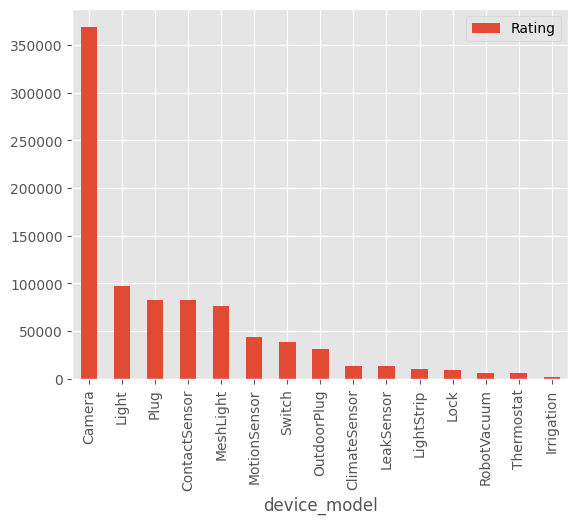

In [ ]:
most_popular2.head(16).plot(kind = "bar")

In [ ]:
# Vectorize
X_test = vectorizer.transform(df2['rule'])

#  predict clusters
predictions = model.predict(X_test)

In [ ]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [ ]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 143162_6_46_143162
 1638741_6_46_1638741
 1615437_6_42_1615437
 1615437_6_42_177877
 1615437_6_46_1615437
 1615437_6_46_177877
 562563_6_46_562563
 562563_6_42_562563
 555054_6_46_555054
 555054_6_42_555054
Cluster 1:
 1623518_37_30_921108
 999460_9_30_1563315
 155594_6_11_64132
 1557708_13_20_751021
 1557708_13_20_543221
 1557708_13_20_35883
 1557708_13_20_1259023
 1557708_13_20_1101403
 155706_9_30_1319946
 1556812_6_42_1556812
Cluster 2:
 1169644_37_9_1202351
 155594_6_9_64132
 1557708_9_10_543221
 1557708_9_10_35883
 1557708_13_20_751021
 1557708_13_20_543221
 1557708_13_20_35883
 1557708_13_20_1259023
 1557708_13_20_1101403
 155706_9_30_1319946
Cluster 3:
 7162_6_2_1508799
 999460_9_30_1563315
 155594_6_10_64132
 1557708_13_20_543221
 1557708_13_20_35883
 1557708_13_20_1259023
 1557708_13_20_1101403
 155706_9_30_1319946
 1556812_6_42_1556812
 1556791_9_34_21636
Cluster 4:
 944153_6_46_944153
 999460_9_30_1563315
 1553658_6_42_1553658
 1557708_13_

## Recommend Rules

In [ ]:
def show_recommendations(user_id, rule):

    Y = vectorizer.transform([rule])
    prediction = model.predict(Y)
    cluster_terms = order_centroids[prediction[0], :50]

    recommendations = []

    for rank, term_index in enumerate(cluster_terms, start=1):
        rule = terms[term_index]
        recommendations.append((user_id, rule, rank))
    df_recommendations = pd.DataFrame(recommendations, columns=['user_id', 'rule', 'rank'])
    return df_recommendations

In [ ]:
show_recommendations("40742", "Camera")

,user_id,rule,rank
0,40742,143162_6_46_143162,1
1,40742,1638741_6_46_1638741,2
2,40742,1615437_6_42_1615437,3
3,40742,1615437_6_42_177877,4
4,40742,1615437_6_46_1615437,5
5,40742,1615437_6_46_177877,6
6,40742,562563_6_46_562563,7
7,40742,562563_6_42_562563,8
8,40742,555054_6_46_555054,9
9,40742,555054_6_42_555054,10


In [ ]:
show_recommendations("40742", "ContactSensor")

,user_id,rule,rank
0,40742,143162_6_46_143162,1
1,40742,1638741_6_46_1638741,2
2,40742,1615437_6_42_1615437,3
3,40742,1615437_6_42_177877,4
4,40742,1615437_6_46_1615437,5
5,40742,1615437_6_46_177877,6
6,40742,562563_6_46_562563,7
7,40742,562563_6_42_562563,8
8,40742,555054_6_46_555054,9
9,40742,555054_6_42_555054,10


In [ ]:
users = df2['user_id'].unique().tolist()
rules = df2['rule'].unique().tolist()

In [ ]:
users_10 = users[:10]

In [ ]:
all_recommendations = []

for user_id in users_10:
    for rule in rules:
        df_recommendations = show_recommendations(user_id, rule)
        all_recommendations.append(df_recommendations)

# Concatenate all dataframes
df_all_recommendations = pd.concat(all_recommendations)

# Reset index
df_all_recommendations.reset_index(drop=True, inplace=True)

In [ ]:
# Save the recommendations to a CSV file
df_all_recommendations.to_csv('recommendations.csv', index=False)

In [ ]:
from google.colab import files
files.download('recommendations.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Call the function and assign the result to a variable
df_recommendations = show_recommendations("40742", "ContactSensor")

# Now you can write df_recommendations to a CSV file
df_recommendations.to_csv('recommendations.csv', index=False)



In [ ]:
from google.colab import files
files.download('recommendations.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>